In [1]:
import bpepi
import matplotlib.pyplot as plt

In [2]:
from bpepi.Modules import fg_torch as fg #pytorch version
# from bpepi.Modules import fg as fg #numpy version

In [5]:
#contacts as [i,j,time, lambda]
contacts = [[1,0,0,0.2],
            [1,2,0,0.2],
            [2,3,0,0.2],
            [3,4,0,0.2],
            [4,1,0,0.2],
            [1,0,1,0.2],
            [1,2,1,0.2],
            [2,3,1,0.2],
            [3,4,3,0.2],
            [4,1,4,0.2]
        ]

#observations as [i, state, time] the state can be S (put 0) or I (put 1)
obs = [[1,0,2],
       [3,1,2],
       [2,1,3],
       [4,0,3],]


In [12]:
N = 5
T = 5
bp_fg = fg.FactorGraph(N,T,contacts,obs,delta=1/N)

In [13]:
bp_fg.update(maxit=1000, print_iter=lambda err, i: print(f"iter: {i}, err_mean: {err[0]}"));

iter: 1, err_mean: 0.12665066123008728
iter: 2, err_mean: 0.04649993032217026
iter: 3, err_mean: 0.00758424773812294
iter: 4, err_mean: 6.705522537231445e-08


In [14]:
marg = bp_fg.marginals()

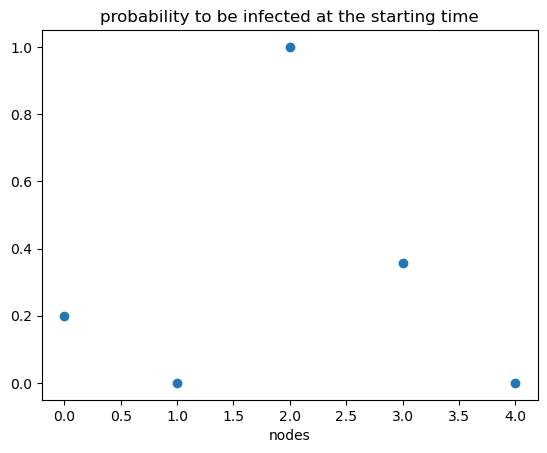

In [15]:
# Plotting the probability of each node to be infected at the starting time (probability to be the source)
plt.plot(range(5), marg[:,0], "o")
plt.title("probability to be infected at the starting time")
plt.xlabel("nodes")
plt.show()